In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import cv2;

%matplotlib inline

# Automatic Panorama Stitching

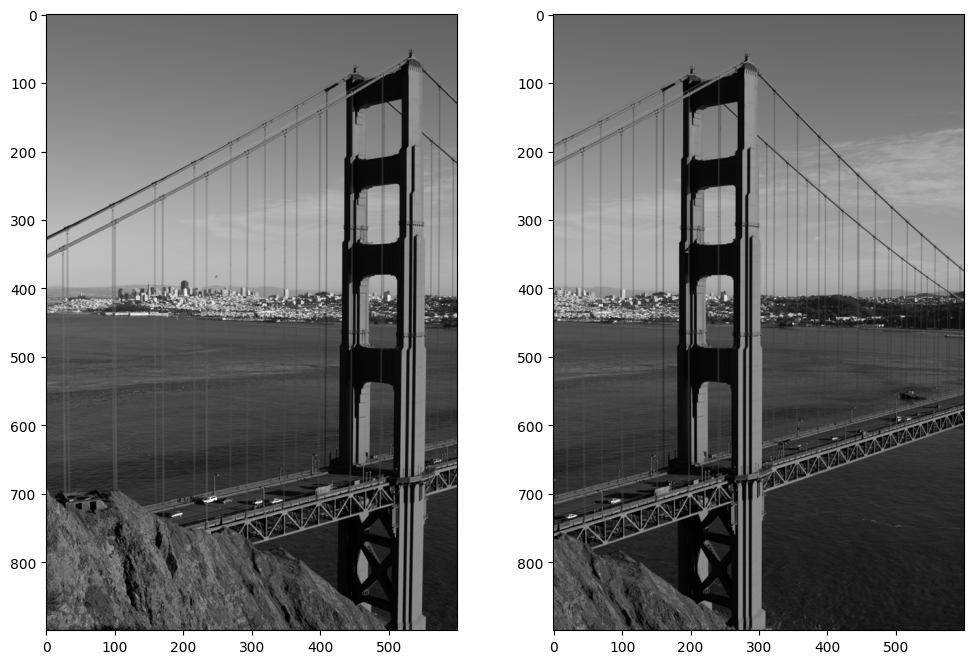

In [2]:
imgL = cv2.imread('goldengate-02.png')
imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
grayL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
img_size = (imgL.shape[1], imgL.shape[0])
imgR = cv2.imread('goldengate-03.png')
imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2RGB)
grayR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1, 2, figsize=(12,8))
axes[0].imshow(imgL)
axes[1].imshow(imgR)

In [15]:
n_features = 3000
sift = cv2.SIFT_create(n_features)
sift.setContrastThreshold(0.02)

In [16]:
keysL, descL = sift.detectAndCompute(grayL, None)
keysR, descR = sift.detectAndCompute(grayR, None)
len(keysL), len(keysR)

(3000, 2923)

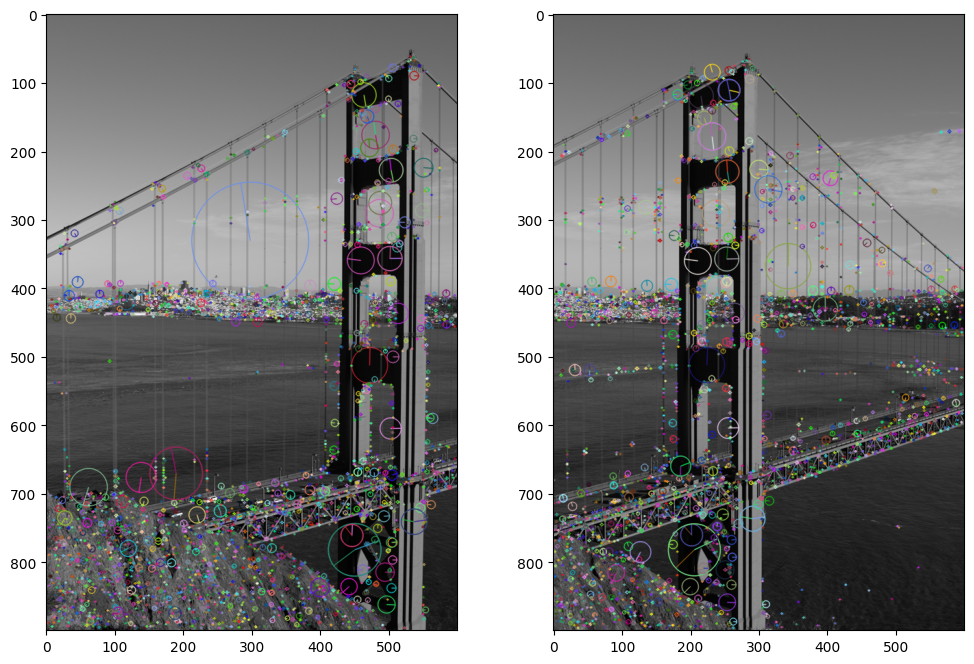

In [17]:
key_imgL = cv2.drawKeypoints(grayL, keysL, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
key_imgR = cv2.drawKeypoints(grayR, keysR, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
fig, axes = plt.subplots(1, 2, figsize=(12,8))
axes[0].imshow(key_imgL)
axes[1].imshow(key_imgR)

In [18]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matchesLR = flann.knnMatch(descL,descR,k=2)

In [41]:
goodMatches = []
for m, n in matchesLR:
    if m.distance < 0.8*n.distance:
        goodMatches.append(m)

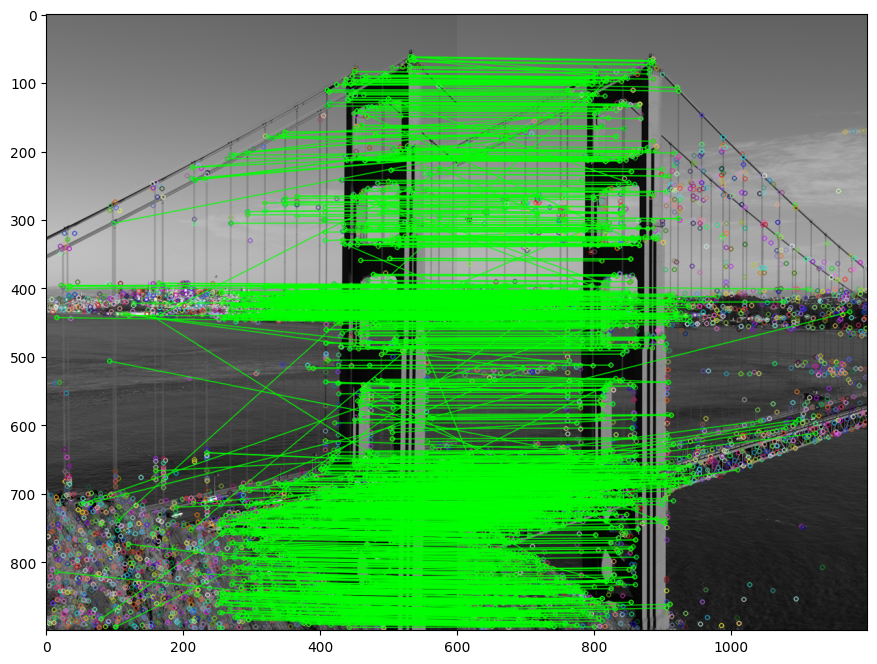

In [42]:
match_imgLR = cv2.drawMatches(grayL, keysL, grayR, keysR, goodMatches, None, matchColor=(0, 255, 0))
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(match_imgLR)

In [47]:
ptsL = np.float32([keysL[m.queryIdx].pt for m in goodMatches])
ptsR = np.float32([keysR[m.trainIdx].pt for m in goodMatches])
H_LR, mask = cv2.findHomography(ptsL, ptsR, cv2.RANSAC)
H_LR, np.sum(mask)

(array([[ 1.09313903e+00,  1.03943293e-02, -2.79293748e+02],
        [ 6.16687533e-02,  1.06867854e+00, -2.65778754e+01],
        [ 1.54389077e-04,  2.78732027e-06,  1.00000000e+00]]),
 1031)

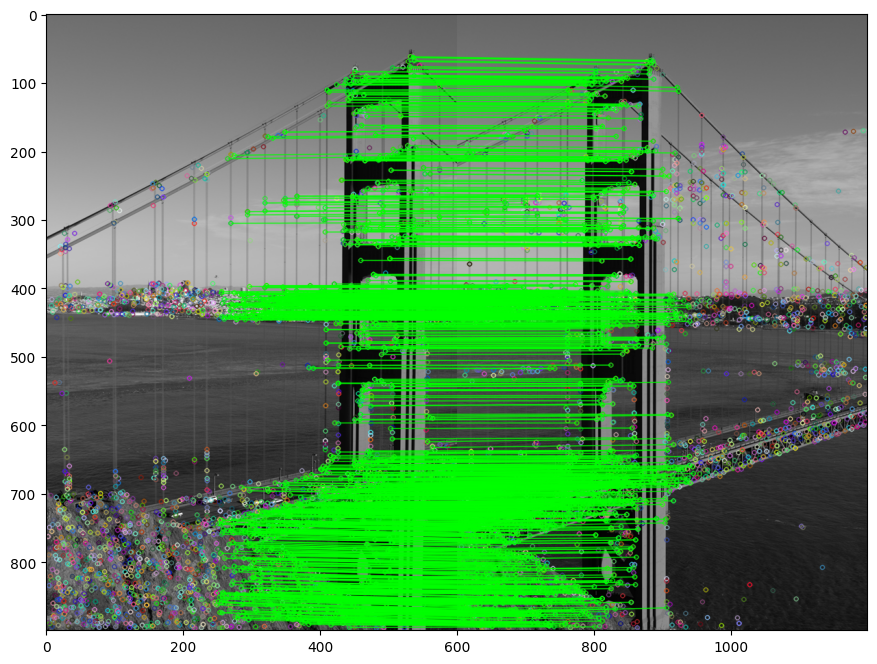

In [49]:
inlier_imgLR = cv2.drawMatches(grayL, keysL, grayR, keysR, goodMatches, None, matchColor=(0, 255, 0), matchesMask = mask.ravel())
fig, ax = plt.subplots(figsize=(12,8))
ax.imshow(inlier_imgLR)